## Two-pole or two-node study

Need:
pole.csv

In [302]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, atan2, pi, sqrt, atan, isnan

In [303]:
pole_excel_file = 'example_for_gridwere.xls'
df = pd.read_excel(pole_excel_file, sheet_name=None)
pole_mount_excel_file = 'pole_mount_data.xls'
df_mount = pd.read_excel(pole_mount_excel_file, sheet_name=None)

FileNotFoundError: [Errno 2] No such file or directory: 'example_for_gridwere.xls'

In [223]:
# creat a dictionary for pole mount data
df_mount_data = df_mount['pole mount data'].copy()
mount_data_dicts = {}
for mount_index in range(len(df_mount_data)):
    mount_data = df_mount_data.iloc[mount_index]
    if mount_data.loc['equipment_id'] not in mount_data_dicts.keys():
        mount_data_dict = {}
        for data_column in mount_data.index:
            if data_column != 'equipment_id':
                mount_data_dict[data_column] = mount_data.loc[data_column]
        mount_data_dicts[mount_data.loc['equipment_id']] = mount_data_dict
# print(mount_data_dicts)

{'equipment_1': {'equipment_type': 'regulator', 'parent': 'pole_1', 'mount_height': 37.5, 'equipment_diameter': 24, 'equipment_height': 5}, 'equipment_2': {'equipment_type': 'transformer', 'parent': 'pole_1', 'mount_height': 52.5, 'equipment_diameter': 23, 'equipment_height': 5}, 'equipment_3': {'equipment_type': 'regulator', 'parent': 'pole_3', 'mount_height': 11.5, 'equipment_diameter': 22, 'equipment_height': 5}, 'equipment_4': {'equipment_type': 'regulator', 'parent': 'pole_4', 'mount_height': 16.5, 'equipment_diameter': 21, 'equipment_height': 5}, 'equipment_5': {'equipment_type': 'regulator', 'parent': 'pole_5', 'mount_height': 21.5, 'equipment_diameter': 20, 'equipment_height': 5}, 'equipment_6': {'equipment_type': 'regulator', 'parent': 'pole_5', 'mount_height': 26.5, 'equipment_diameter': 19, 'equipment_height': 5}, 'equipment_7': {'equipment_type': 'regulator', 'parent': 'pole_7', 'mount_height': 31.0, 'equipment_diameter': 18, 'equipment_height': 5}, 'equipment_8': {'equipme

In [188]:
# creat a dictionary for pole data
df_pole_data = df['pole data'].copy()
pole_data_dicts = {}
for pole_index in range(len(df_pole_data)):
    pole_data = df_pole_data.iloc[pole_index]
    if pole_data.loc['pole_id'] not in pole_data_dicts.keys():
        pole_data_dict = {}
        for data_column in pole_data.index:
            if data_column != 'pole_id':
                pole_data_dict[data_column] = pole_data.loc[data_column]
        pole_data_dicts[pole_data.loc['pole_id']] = pole_data_dict
# print(pole_data_dicts)

In [189]:
# creat a dictionary for pole connections
df_pole_section = df['pole section'].copy()
pole_section_dicts = {}
for section_index in range(len(df_pole_section)):
    pole_section = df_pole_section.iloc[section_index]
    if pole_section.loc['section_id'] not in pole_section_dicts.keys():
        pole_section_dict = {}
        for data_column in pole_section.index:
            if data_column != 'section_id':
                pole_section_dict[data_column] = pole_section.loc[data_column]
        pole_section_dicts[pole_section.loc['section_id']] = pole_section_dict
# print(pole_section_dicts)

In [211]:
df_pole_config = df['pole config'].copy()
pole_config_dicts = {}
for pole_config_index in range(len(df_pole_config)):
    pole_config = df_pole_config.iloc[pole_config_index]
    if pole_config.loc['config_id'] not in pole_config_dicts.keys():
        pole_config_dict = {}
        for data_column in pole_config.index:
            if data_column != 'config_id':
                pole_config_dict[data_column] = pole_config.loc[data_column]
        pole_config_dicts[pole_config.loc['config_id']] = pole_config_dict
# print(pole_config_dicts)

In [191]:
df_cable_config = df['cable config'].copy()
cable_config_dicts = {}
for cable_config_index in range(len(df_cable_config)):
    cable_config = df_cable_config.iloc[cable_config_index]
    if cable_config.loc['config_id'] not in cable_config_dicts.keys():
        cable_config_dict = {}
        for data_column in cable_config.index:
            if data_column != 'config_id':
                cable_config_dict[data_column] = cable_config.loc[data_column]
        cable_config_dicts[cable_config.loc['config_id']] = cable_config_dict
# print(cable_config_dicts)

In [192]:
df_weather_data = df['weather player'].copy()
time_stamps = []
wind_speeds = []
wind_directions = []
ambient_temps = []
wind_gusts = []
GHIs = []
default_wind_speed = 0
for weather_timesttamp in range(len(df_weather_data)):
    date = df_weather_data.iloc[weather_timesttamp]['time']
    if pd.isnull(date):
        raise Exception(f'column {weather_timesttamp}: time stamp is not set up')
    date = date - pd.Timestamp("1970-01-01")
    time_stamps.append(date.total_seconds())
    if pd.isnull(df_weather_data.iloc[weather_timesttamp]['wind_speed']) \
       or df_weather_data.iloc[weather_timesttamp]['wind_speed'] < 0:
        print(f'weather data does not include wind_speed at {date}, using local default_wind_speed')
        wind_speeds.append(0)
    else:
        wind_speeds.append(df_weather_data.iloc[weather_timesttamp]['wind_speed'])
    wind_directions.append(df_weather_data.iloc[weather_timesttamp]['wind_direction'])
    ambient_temps.append(df_weather_data.iloc[weather_timesttamp]['temperature'])
    wind_gusts.append(df_weather_data.iloc[weather_timesttamp]['wind_gusts'])
    GHIs.append(df_weather_data.iloc[weather_timesttamp]['global_horizontal_irradiance'])


In [235]:
def equipment_moment_cals(pole_key,wind_presure,mount_data,overload_factor=1.75):
    equipment_moment = 0.0
    for equipment in mount_data.keys():
        if mount_data[equipment]['parent'] == pole_key:
            equipment_moment += wind_presure*mount_data[equipment]['mount_height']\
            *mount_data[equipment]['equipment_diameter']*mount_data[equipment]['equipment_height']*overload_factor/12
    return equipment_moment

In [266]:
def get_wind_span(pos1, pos2):
    # TODO, only use the distance to represent the wind span for now
    lat1 = pos1[0]*pi/180
    lat2 = pos2[0]*pi/180
    lon1 = pos1[1]*pi/180
    lon2 = pos2[1]*pi/180
    a = sin((lat2-lat1)/2)**2+cos(lat1)*cos(lat2)*sin((lon2-lon1)/2)**2
    return 6371e3*(2*atan2(np.sqrt(a),sqrt(1-a)))

In [281]:
feeder_file_path = '/Users/fxie2/Downloads/NG_to_Hitachi/Final List of Feeders.csv'
feeder_data = pd.read_csv(feeder_file_path)
# print(feeder_data)
summary = {}
count = 0
for index in range(len(feeder_data)):
    feeder_strings = feeder_data.iloc[index].tolist()[0].split('_')
    if str(feeder_strings[1]) not in summary.keys():
        summary[str(feeder_strings[1])] = 0
    summary[str(feeder_strings[1])] += 1
    count += 1
print(count)
print(summary)

2009
{'01': 512, '03': 182, '04': 41, '05': 35, '06': 46, '07': 22, '08': 22, '09': 31, '10': 54, '11': 221, '12': 20, '13': 38, '14': 27, '16': 8, '17': 72, '18': 28, '19': 20, '20': 15, '23': 18, '24': 17, '25': 26, '26': 6, '27': 18, '28': 16, '29': 11, '30': 159, '31': 61, '32': 76, '33': 16, '35': 62, '37': 17, '38': 43, '39': 46, '40': 16, '41': 7}


In [298]:
def wire_moment_cals(pole_key,pole_height,wind_presure,wind_direction,pole_data,pole_sections,pole_config,cable_config,ice_thickness):
    wire_moment = 0.0
    wire_moment_x = 0.0
    wire_moment_y = 0.0
    wire_moment_z = 0.0
    overload_factor_wire=1.65
    overload_factor_wind=1.75
    if pole_data['tilt_angle'] != 0:
        tilt_direction = pole_data['tilt_direction']
    else:
        tilt_direction = 0
    for section_index in range(len(pole_sections)):
        print(section_index)
        print(pole_sections)
        pole_section = pole_sections.iloc[section_index]
        print(pole_section)
        printt()
        if pole_section['from'] == pole_key or pole_section['to'] == pole_key:
            cable_type_id = pole_section[section_id]['cable_type']
            cable_diameter = cable_config[cable_type_id]['diameter']*39.3701 # 39.3701 account for m to inches conversion
            if pole_section[section_id]['from'] == pole_key:
                p0 = [pole_data[pole_section[section_id]['from']]['latitude'],pole_data[pole_section[section_id]['from']]['longitude']]
                p1 = [pole_data[pole_section[section_id]['to']]['latitude'],pole_data[pole_section[section_id]['to']]['longitude']]
                pole_cable_angle = pole_section[section_id]['from_pole_line_angle']
            else:
                p1 = [pole_data[pole_section[section_id]['from']]['latitude'],pole_data[pole_section[section_id]['from']]['longitude']]
                p0 = [pole_data[pole_section[section_id]['to']]['latitude'],pole_data[pole_section[section_id]['to']]['longitude']]
                pole_cable_angle = pole_section[section_id]['to_pole_line_angle']
            wind_span = get_wind_span(p0,p1)
            cable_height = pole_config['conductor_attach_height']
            section_heading = 180*atan2(p1[1]-p0[1],p1[0]-p0[0])/np.pi
            angle_wind_section = abs(wind_direction - section_heading)*pi/180
            cable_transverse_load_wind = wind_presure*sin(angle_wind_section)*wind_span*(cable_diameter+2*ice_thickness)/12 # cable wind load
            try:
                cable_transverse_load_tension = pole_section[section_id]['tension']
            except:
                print(f'tension is calculated with cable information and powerflow result')
                # TODO
            cable_load = cable_transverse_load_wind*overload_factor_wind + cable_transverse_load_tension*overload_factor_wire
            r_z = pole_height*cos(100*pole_data['tilt_angle']/pi)
            r_x = pole_height*sin(100*pole_data['tilt_angle']/pi)*cos(pi*tilt_direction/180)
            r_y = pole_height*sin(100*pole_data['tilt_angle']/pi)*sin(pi*tilt_direction/180)
            cable_load_z = -cable_load*cos(pi*pole_cable_angle/pi)
            cable_load_x = cable_load*sin(pi*pole_cable_angle/pi)*cos(pi*section_heading/180)
            cable_load_y = cable_load*sin(pi*pole_cable_angle/pi)*sin(pi*section_heading/180)
            wire_moment_x += r_y*cable_load_z-r_z*cable_load_y
            wire_moment_y += r_y*cable_load_z-r_z*cable_load_y
            wire_moment_z += r_y*cable_load_z-r_z*cable_load_y

    return [wire_moment_x, wire_moment_y, wire_moment_z]

-101.30993247402021
-5
116.30993247402021


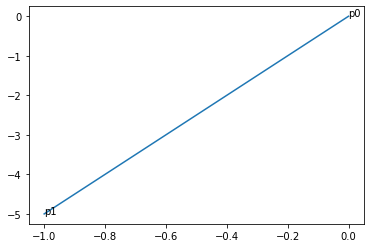

In [299]:
p0 = [37.41504514,-122.2056472]
p1 = [37.41469802,-122.2084875]
p0 = [0,0]
p1 = [-1,-5]
section_heading = 180*atan2(p1[1]-p0[1],p1[0]-p0[0])/np.pi
print(section_heading)
print(p1[1]-p0[1])

wind_direction = 15
angle_wind_section = (wind_direction - section_heading)
print(angle_wind_section)
x = [p0[0],p1[0]]
y = [p0[1],p1[1]]
plt.text(x[0],y[0],'p0')
plt.text(x[1],y[1],'p1')
plt.plot(x,y)
plt.show()

In [301]:
pole_analysis_dict = {}
PS_OK = 1
PS_FAILED = 0
default_repair_time = 8
last_wind_speed = 0.0
for pole_key in pole_data_dicts.keys():
    pole_analysis_dict[pole_key] = {
        'wire_tention_on_pole' : [],
        'wind_moment_on_pole' : [],
        'total_moment_on_pole' : [],
        'pole_susceptibility' : [],
        'pole_stress' : [],
        'pole_status' : PS_OK,
        'pole_age' : [],
        'pole_current_hollow_diameter' : [],
        'critical_wind_speed' : 0.0,
        'pole_down_time' : 0.0,
        'pole_resisting_moment' : []
    }

# pole init
if len(pole_config_dicts.keys()) == 0:
    raise Exception(f'pole configuration is not set')

for pole_config_index in pole_config_dicts.keys():
    if np.isnan(pole_config_dicts[pole_config_index]['repair_time']) or pole_config_dicts[pole_config_index]['repair_time'] <= 0:
        print(f'{pole_config_index}: repair time should be position and default_repair_time will be used')
        pole_config_dicts[pole_config_index]['repair_time'] = default_repair_time

# pole precommit
# for timestamp_index in range(len(time_stamps)):
for timestamp_index in range(2):
    wind_speed = wind_speeds[timestamp_index]
    for pole_key in pole_data_dicts.keys():
        pole_data = pole_data_dicts[pole_key]
        pole_config_id = pole_data['config']
        pole_config_data = pole_config_dicts[pole_config_id]
        t0 = time_stamps[timestamp_index]
        # effective pole height, for this example, unit in ft
        try:
            pole_height = pole_config_data['pole_length']-pole_config_data['pole_depth']\
                          -pole_data_dicts[pole_key]['guy_height']
        except:
            raise Exception(f'pole height error for {pole_key}')
        pole_t0_year = 1970 + int(t0/86400/365.24)
        age = pole_t0_year-pole_data_dicts[pole_key]['install_year']
        pole_analysis_dict[pole_key]['pole_age'].append(age)
        pole_ground_diameter = pole_config_data['ground_diameter'] - pole_height\
                               /(pole_config_data['pole_length']-pole_config_data['pole_depth'])\
                               *(pole_config_data['ground_diameter']-pole_config_data['top_diameter'])
        pole_top_diameter = pole_config_data['top_diameter']
        if age > 0 and pole_config_data['degradation_rate'] > 0:
            current_hollow_diameter = 2.0 * age * pole_config_data['degradation_rate'] * pole_ground_diameter
        else:
            current_hollow_diameter  = 0
        resisting_moment = 0.008186 * pole_config_data['strength_factor_250b_wood'] * pole_config_data['fiber_strength'] * (pole_ground_diameter**3 - current_hollow_diameter**3)
        if resisting_moment < 0:
            print('pole has degraded past point of static failure')
            resisting_moment = 0
        pole_analysis_dict[pole_key]['pole_resisting_moment'].append(resisting_moment)
        # print(f'{pole_key}: resisting_moment = {resisting_moment} ft*lb at {time_stamps[timestamp_index]}')
        if (pole_analysis_dict[pole_key]['pole_status'] == PS_FAILED) and ((t0 - pole_analysis_dict[pole_key]['pole_down_time'])/3600.0 > pole_config_data['repair_time']):
            print('pole repair time has arrived')
            pole_analysis_dict[pole_key]['pole_status'] = PS_OK
            pole_analysis_dict[pole_key]['tilt_angle'] = 0.0 
            pole_analysis_dict[pole_key]['tilt_direction'] = 0.0
            pole_analysis_dict[pole_key]['install_year'] = 1970 + (t0/86400/365.24)
        elif pole_analysis_dict[pole_key]['pole_status'] == PS_OK and (last_wind_speed != wind_speed or pole_analysis_dict[pole_key]['critical_wind_speed'] == 0.0):
            if pole_data['tilt_angle'] > 0.0:
                top_diameter_ft = pole_top_diameter/12
                ground_diameter_ft = pole_ground_diameter/12
                pole_moment_tilt = 0.125*pole_config_data['material_density']*np.pi*pole_height*pole_height\
                                    *(((top_diameter_ft+ground_diameter_ft)**2)/6+top_diameter_ft*top_diameter_ft/3)\
                                    *sin(pi*pole_data['tilt_angle']/180)
                # print(f'{pole_key}: pole_moment_tilt = {pole_moment_tilt} ft*lb')
            wind_presure = 0.00256 * 2.24 * (wind_speed) * (wind_speed) # 2.24 account for m/s to mph conversion
            # print(f"wind_pressure = {wind_presure} psi")
            pole_moment_unit_wind = pole_height*pole_height * (2*top_diameter_ft+ground_diameter_ft)/6 * pole_config_data['overload_factor_transverse_general']
            # print(f"{pole_key}: pole_moment_unit_wind = {pole_moment_unit_wind} ft.lb.s/m")
            equipment_moment_unit_wind = equipment_moment_cals(pole_key,1,mount_data_dicts,pole_config_data['overload_factor_transverse_general'])
            # print(f"{pole_key}: equipment_moment_unit_wind = {equipment_moment_unit_wind} ft.lb.s/m")
            wire_moment_unit_wind = wire_moment_cals(pole_key,pole_height,wind_presure,wind_direction,pole_data,pole_section_dicts,pole_config,cable_config,0)
            print(wire_moment_unit_wind)
            
# print(pole_analysis_dict['pole_1']['pole_resisting_moment'])

0
{'section_1': {'from': 'pole 1', 'to': 'pole 2', 'powerflow': 10000, 'cable_type': 'TACSR/AC 610mm^2', 'tensions': 21600}, 'section_2': {'from': 'pole 2', 'to': 'pole 3', 'powerflow': 10000, 'cable_type': 'TACSR/AC 610mm^3', 'tensions': 21600}, 'section_3': {'from': 'pole 3', 'to': 'pole 4', 'powerflow': 10000, 'cable_type': 'TACSR/AC 610mm^4', 'tensions': 21600}, 'section_4': {'from': 'pole 4', 'to': 'pole 5', 'powerflow': 10000, 'cable_type': 'TACSR/AC 610mm^5', 'tensions': 21600}, 'section_5': {'from': 'pole 5', 'to': 'pole 6', 'powerflow': 10000, 'cable_type': 'TACSR/AC 610mm^6', 'tensions': 21600}, 'section_6': {'from': 'pole 6', 'to': 'pole 7', 'powerflow': 10000, 'cable_type': 'TACSR/AC 610mm^7', 'tensions': 21600}, 'section_7': {'from': 'pole 7', 'to': 'pole 8', 'powerflow': 10000, 'cable_type': 'TACSR/AC 610mm^8', 'tensions': 21600}, 'section_8': {'from': 'pole 8', 'to': 'pole 9', 'powerflow': 10000, 'cable_type': 'TACSR/AC 610mm^9', 'tensions': 21600}, 'section_9': {'from':

AttributeError: 'dict' object has no attribute 'iloc'